In [4]:
import matplotlib.pyplot as plt
import scanpy as sc
import scvi
import os

In [5]:
save_path = "data"
url = (
    "https://github.com/YosefLab/scVI-data/raw/master/pbmc_10k_protein_v3.h5ad?raw=true"
)
adata = sc.read(os.path.join(save_path, "pbmc_10k_protein_v3.h5ad"), backup_url=url)

adata.layers["counts"] = adata.X.copy()  # preserve counts
sc.pp.normalize_total(adata, target_sum=10e4)
sc.pp.log1p(adata)
adata.raw = adata  # freeze the state in `.raw`

sc.pp.highly_variable_genes(
    adata, flavor="seurat_v3", layer="counts", n_top_genes=1000, subset=True
)

In [ ]:
adata

AnnData object with n_obs × n_vars = 6855 × 1000
    obs: 'n_genes', 'percent_mito', 'n_counts'
    var: 'n_cells', 'highly_variable', 'encode', 'hvg_encode', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'protein_names', 'log1p', 'hvg'
    obsm: 'protein_expression'
    layers: 'counts'

In [6]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts")
model = scvi.model.SCVI(adata, n_latent = 10, prior_distribution = "mixofgaus",prior_kwargs={"k":5})

In [7]:
model.train(max_epochs = 20, plan_kwargs = {"lr":5e-3},check_val_every_n_epoch=10)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 20/20: 100%|██████████| 20/20 [00:22<00:00,  1.15s/it, v_num=1, train_loss_step=283, train_loss_epoch=356]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [00:22<00:00,  1.11s/it, v_num=1, train_loss_step=283, train_loss_epoch=356]


<Axes: xlabel='epoch'>

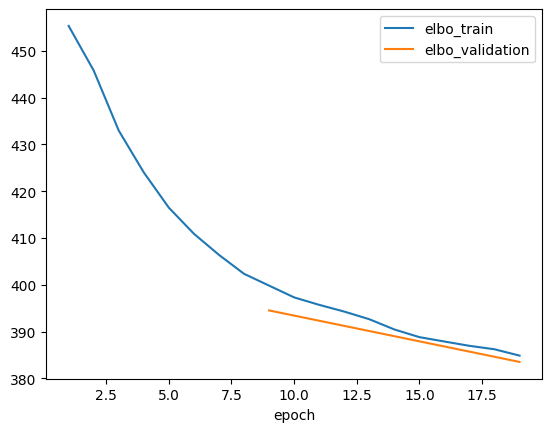

In [8]:
train_elbo = model.history["elbo_train"][1:]
test_elbo = model.history["elbo_validation"]
ax = train_elbo.plot()
test_elbo.plot(ax=ax)